# Librerias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import Algoritmosnumericos as Alg
plt.style.use('dark_background')
%config InlineBackend.figure_format = 'retina'
%matplotlib widget

# Análisis cuantitativo

## Ley de Ohm para diferentes resistores

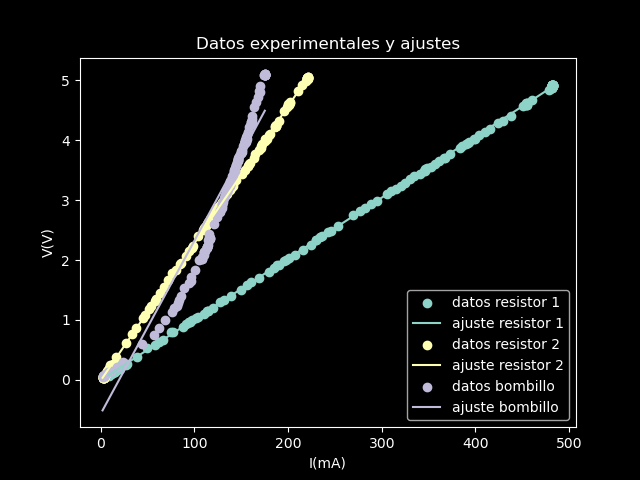

In [4]:
R1 = 10  # resistencia teórica resistor 1 Ω
R2 = 22  # resistencia teórica resistor 2 Ω
I_vs_R_1 = pd.read_csv('datos resistor 1.txt', delimiter='\t')
I_vs_R_2 = pd.read_csv('datos resistor 2.txt', delimiter='\t')
I_vs_R_bombillo = pd.read_csv('datos bombillo.txt', delimiter='\t')


R1exp = round(Alg.regresionlineal(
    I_vs_R_1['I(mA)'], I_vs_R_1['V(V)'])[0][0]*1000)
R2exp = round(Alg.regresionlineal(
    I_vs_R_2['I(mA)'], I_vs_R_2['V(V)'])[0][0]*1000)
Rbombillo = round(Alg.regresionlineal(
    I_vs_R_bombillo['I(mA)'], I_vs_R_bombillo['V(V)'])[0][0]*1000)
rbombillo = round(Alg.regresionlineal(
    I_vs_R_bombillo['I(mA)'], I_vs_R_bombillo['V(V)'])[2], 2)

ΔR1 = round(Alg.regresionlineal(
    I_vs_R_1['I(mA)'], I_vs_R_1['V(V)'])[1][0], 5)
ΔR2 = round(Alg.regresionlineal(
    I_vs_R_2['I(mA)'], I_vs_R_2['V(V)'])[1][0], 4)
ΔRbombillo = round(Alg.regresionlineal(
    I_vs_R_bombillo['I(mA)'], I_vs_R_bombillo['V(V)'])[1][0], 3)

error1 = round(abs(R1-R1exp)/R1*100)
error2 = round(abs(R2-R2exp)/R2*100)

fig, ax = plt.subplots()

lista = [[I_vs_R_1, 'resistor 1'], [I_vs_R_2, 'resistor 2'], [I_vs_R_bombillo,
                                                              'bombillo']]
for i in lista:
    datos = i[0]
    label = i[1]
    Alg.dibujo_reglineal(datos['I(mA)'].tolist(), datos['V(V)'].tolist(
    ), 0, 0, 'Datos experimentales y ajustes', 'I(mA)', 'V(V)', ax, label)

Basandonos en las gráficas de corriente contra voltaje, **podemos decir que si se cumple la ley de ohm** ya que las magnitudes fisicas anteriormente mencionadas son directamente proporcionales.Realizamos el ajuste para comparar el valor teórico y el experimental. 

In [3]:
print('El valor experimental para la resistencia 1 es:(', R1exp, '+-', ΔR1,
      ')Ω Comparando con el valor teórico que es:', R1, 'Ω el error fue', error1, '%')
print('-'*23)
print('El valor experimental para la resistencia 2 es:(', R2exp, '+-', ΔR2,
      ')Ω Comparando con el valor teórico que es:', R2, 'Ω el error fue:', error2, '%')
print('-'*23)
print('El valor para la resistencia del bombillo es:(', Rbombillo, '+-', ΔRbombillo,
      ')Ω, adicionalmente el coeficiente de correlación del ajuste de esta resistencia de acuerdo a la ley de omh es:',
      rbombillo)
print('-'*23)
print('Vemos que los valores concuerdan de manera aceptable, adicionalmente gráficamente se ve que se cumple la ley')
print('de ohm incluso para el bombillo, mismo que presenta un coeficiente de correlación excelente.')

El valor experimental para la resistencia 1 es:( 10 +- 8e-05 )Ω Comparando con el valor teórico que es: 10 Ω el error fue 0 %
-----------------------
El valor experimental para la resistencia 2 es:( 23 +- 0.0002 )Ω Comparando con el valor teórico que es: 22 Ω el error fue: 5 %
-----------------------
El valor para la resistencia del bombillo es:( 29 +- 0.008 )Ω, adicionalmente el coeficiente de correlación del ajuste de esta resistencia de acuerdo a la ley de omh es: 0.97
-----------------------
Vemos que los valores concuerdan de manera aceptable, adicionalmente gráficamente se ve que se cumple la ley
de ohm incluso para el bombillo, mismo que presenta un coeficiente de correlación excelente.


El rango de tolerancia para el resistor 1 y 2 son respectivamente 0.5Ω,1.1Ω 

De acuerdo a los resultados anteriores podemos ver que los resultados experimentales estan dentro del rango abarcado por la impresición medida por la tolerancia de las resistencias. (Se adjunta información a continuación)

--------------------------------------------------------


**Resistencia 1** (9.5Ω a 10.5Ω) rango del fabricante.

resultado experimental=10Ω

--------------------------------------------------------

**Resistencia 2**(20.9Ω a 23.1Ω) rango del fabricante.

resultado experimental=23Ω

--------------------------------------------------------



Por lo tanto nuestros valores concuerdan con las tolerancias dada por el fabricante.

## Ley de Ohm para un diodo

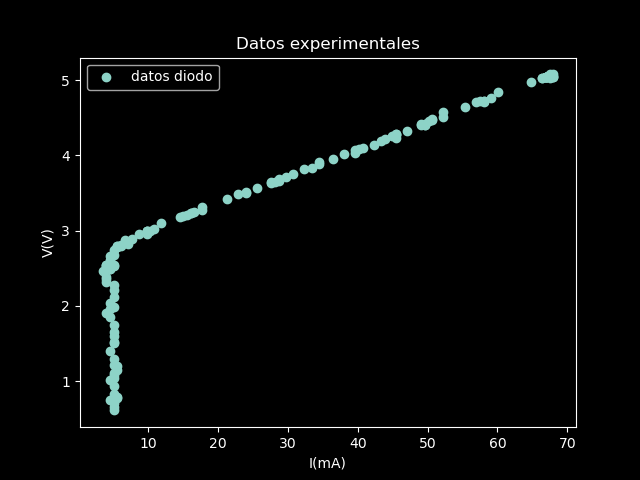

In [9]:
I_vs_R_diodo = pd.read_csv('datos diodo.txt', delimiter='\t')
fig, ax = plt.subplots()
ax.scatter(I_vs_R_diodo['I(mA)'], I_vs_R_diodo['V(V)'], label='datos diodo')
ax.set_xlabel('I(mA)')
ax.set_ylabel('V(V)')
ax.set_title('Datos experimentales')
ax.legend()

Evidentemente no se cumple la ley de ohm,ya que la corriente y el voltaje no son directamente proporcionales(no hay simetría a través del origen).

En otras palabras la relación entre corriente y voltaje es mucho más compleja y tendríamos que hacer un ajuste no lineal en los datos. Concluimos que el **Diodo semiconductor no es óhmico**

## Resistores en serie y en paralelo

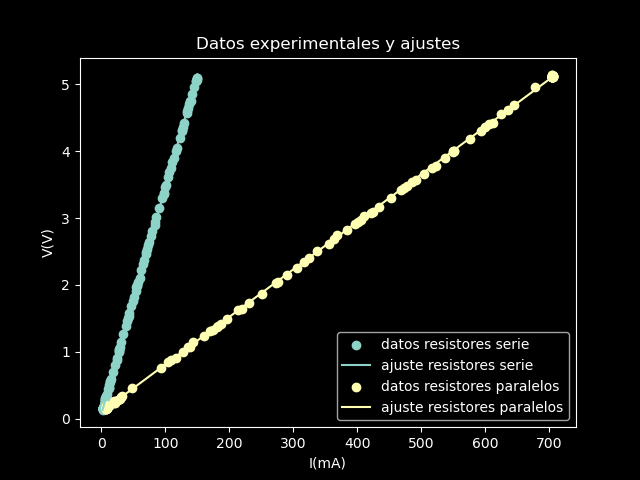

In [10]:
# Utilizamos los resitores del experimento 1
Rserie = round(R1+R2)
inv_Rpar = (R1**-1)+(R2**-1)
Rpar = round(inv_Rpar**-1)
I_vs_R_serie = pd.read_csv('datos resistores serie.txt', delimiter='\t')
I_vs_R_par = pd.read_csv('datos resistores paralelos.txt', delimiter='\t')

Rserieexp = round(Alg.regresionlineal(
    I_vs_R_serie['I(mA)'], I_vs_R_serie['V(V)'])[0][0]*1000)
Rparexp = round(Alg.regresionlineal(
    I_vs_R_par['I(mA)'], I_vs_R_par['V(V)'])[0][0]*1000)


ΔRserie = round(Alg.regresionlineal(
    I_vs_R_serie['I(mA)'], I_vs_R_serie['V(V)'])[1][0], 4)

ΔRpar = round(Alg.regresionlineal(
    I_vs_R_par['I(mA)'], I_vs_R_par['V(V)'])[1][0], 5)

errorpar = round(abs(Rparexp-Rpar)/Rpar*100)
errorserie = round(abs(Rserieexp-Rserie)/Rserie*100)

fig, ax = plt.subplots()

Alg.dibujo_reglineal(I_vs_R_serie['I(mA)'].tolist(), I_vs_R_serie['V(V)'].tolist(
), 0, 0, 'Datos experimentales y ajustes', 'I(mA)', 'V(V)', ax, 'resistores serie')
Alg.dibujo_reglineal(I_vs_R_par['I(mA)'].tolist(), I_vs_R_par['V(V)'].tolist(
), 0, 0, 'Datos experimentales y ajustes', 'I(mA)', 'V(V)', ax, 'resistores paralelos')

In [6]:
print('El valor experimental para la resistencia en serie es:(', Rserieexp, '+-', ΔRserie,
      ')Ω Comparando con el valor teórico que es:', Rserie, 'Ω el error \n fue', errorserie, '%')
print('-'*23)
print('El valor experimental para la resistencia en paralelo es:(', Rparexp, '+-', ΔRpar,
      ')Ω Comparando con el valor teórico que es:', Rpar, 'Ω el error \n fue:', errorpar, '%')
print('-'*23)
print('Vemos que los valores concuerdan de manera aceptable, adicionalmente gráficamente se ve que se cumple la ley de')
print('ohm.')

El valor experimental para la resistencia en serie es:( 34 +- 0.0005 )Ω Comparando con el valor teórico que es: 32 Ω el error 
 fue 6 %
-----------------------
El valor experimental para la resistencia en paralelo es:( 7 +- 5e-05 )Ω Comparando con el valor teórico que es: 7 Ω el error 
 fue: 0 %
-----------------------
Vemos que los valores concuerdan de manera aceptable, adicionalmente gráficamente se ve que se cumple la ley de
ohm.


# Análisis Cualitativo


- Toque con cuidado uno de los resistores con el dedo
apenas termine cada uno de los experimentos de ley
de Ohm y note su temperatura. ¿Está caliente? ¿Por
qué pasa esto? ¿Hay resistencias que se calientan más
que otras?

R// Esto pasa por que al pasar los electrones libres por los iones fijos y positivos del metal, estos mismos chocan aumentando su energía interna; esto se manifiesta como un aumento en la temperatura del conductor.

Por otro lado si existen conductores que se calientan más que otros, ya que diferentes conductores presentan resistencias diferentes , esto se manifiesta en la resistividad, que mide que tan fuerte debe ser el campo eléctrico para que fluyan los electrones con determinada densidad de corriente. Por último el hecho de que haya más resistencia implica que existirá más disipación de energía ocasionada por la resistencia de los iones positivos, esto se manifestará con algún grado de aumento en la temperatura. Por lo tanto si, hay resistencias que se calientan más que otras.

- ¿Qué pasaría si invirtiese el sentido de la corriente
en el primer montaje? Describa con palabras cómo
hubiese sido la gráfica de los datos.

R// Si esto pasará entonces ya no se descargaría la fuente de energía, si no por el contrario se cargaria. Adicionalmente la gráfica se vería reflejada en el origen por el cambio de dirección de corriente. El voltaje negativo significa que la corriente va en dirección de una zona de menor potencial a una de mayor potencial. En este caso tendríamos que cambiar la resistencia por un alternador que gastaría otro tipo de energía para mover las cargas almacenando así la energía en la fuente.

-  ¿Por qué en la configuración de resistores en paralelo
la corriente es diferente en cada una? ¿Por qué la
caída voltaje en cada uno es el mismo?

R//Como se puede apreciar en la **imagen 1** del montaje del circuito en paralelo, el diferencial de potencial en ambos resistores es el mismo. No obstante, las resistencias de ambos resistores es diferente. Por ley de Ohm sabemos que:

V=IR 

ó despenado la corriente:

I=V/R

Así, note que aunque tengan un voltaje equivalente, si las resistencia son diferentes no se obtendrá una corriente equivalente. Y por tanto las corrientes son diferentes en un circuito en paralelo siempre que los valores de las resistencias sean diferentes.

Adicionalmente como se ve en la **imagen 2**. El potencial del lado rojo y el potencial del lado azul llegan a ambos resistores en la misma "linea" del circuito, y por tanto sus diferencias de potenciales deben ser las mismas.

- Si revisa el dorso del sensor de energía, encontrará un
esquemático del interior del sensor y de cómo están
ubicados el amperímetro y el voltímetro. ¿Por qué
están configurados de esa manera? ¿Qué pasaría si cambiasen de posición el voltímetro y el amperímetro? ¿Qué lectura arrojaría cada uno en ese caso?

R//Como se puede apreciar en la **imagen 3**, en el sensor de energía se ponen dos cables conductores. Así, el amperímetro se coloca en un solo cable con el fin de medir la corriente que pasa por el cable. Y el voltímetro se coloca en medio de los dos cables con el fin de que pueda medir cual es la diferencia de potencial (voltaje) que existe entre los dos cables.

Del lado de la otra pregunta tenemos:

Depende:

Voltimetro:

Si el voltimetro esta conectado a un solo cable el voltaje dará  0, pues se esta midiendo una diferencia de potencial inexistente. Así, para poder medir el voltaje, siempre hay que poner el voltimetro entre dos cables, que generen una diferencia de potencial.

Amperimetro: 

La corriente del amperimetro no cabia dependiendo de en que cable se ponga, pues cuando el circuito esta cerrado, la corriente que sale de la fuente, es la misma que la que entra a la fuente. Así, el unico momento donde el amperimetro marca 0 es cuando el circueto esta abierto o la bateria esta apagada.



**Imagen 1**
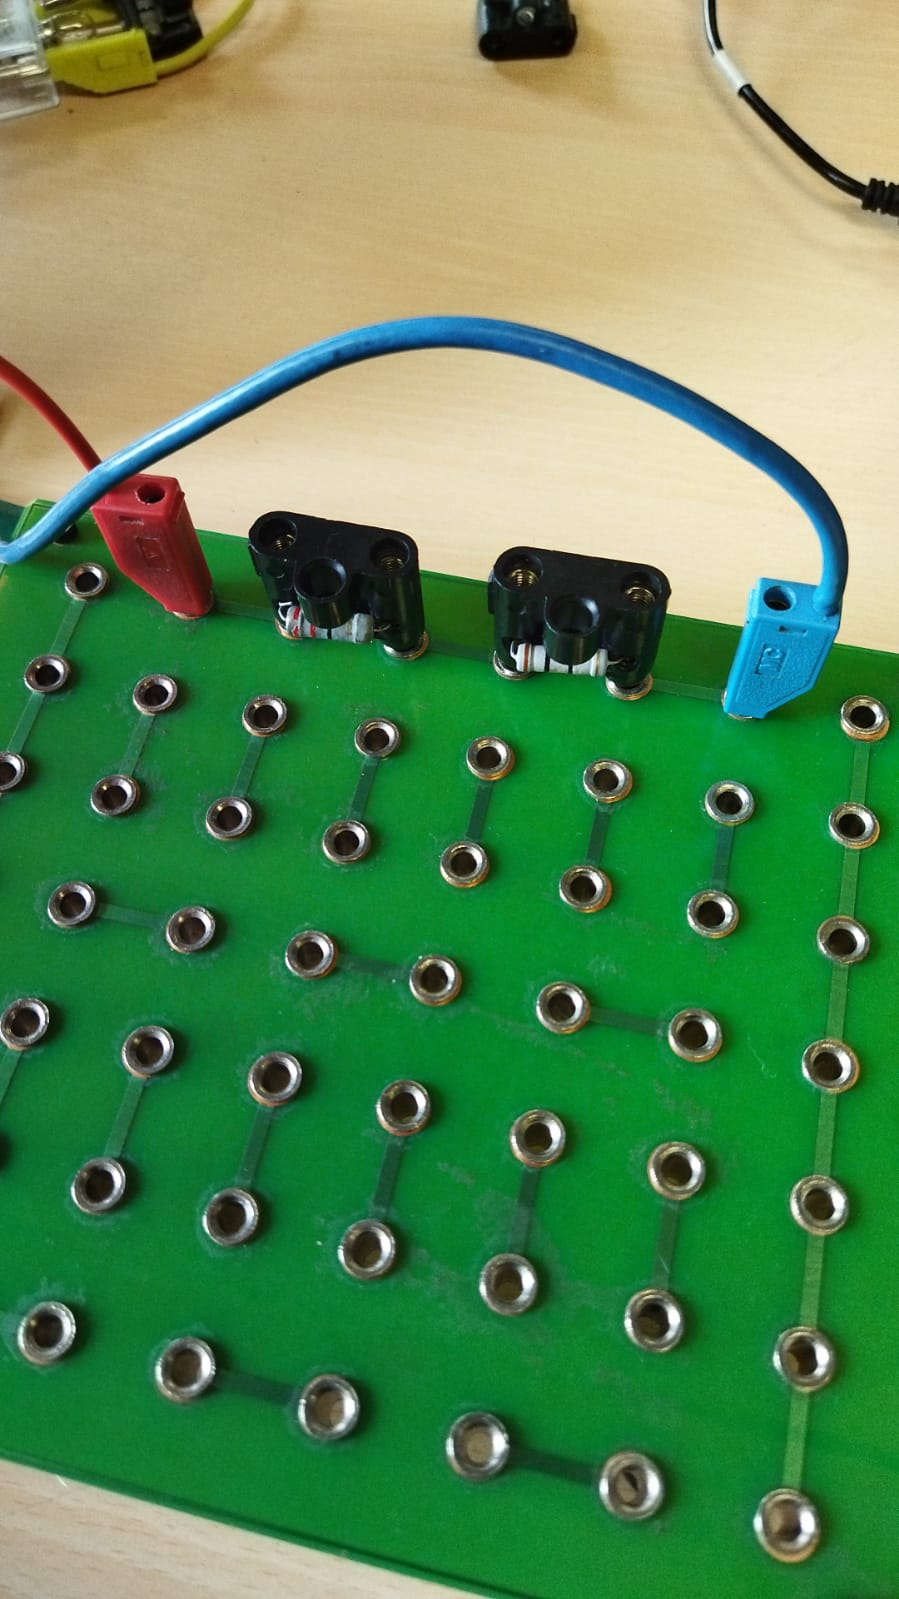


**Imagen 2**
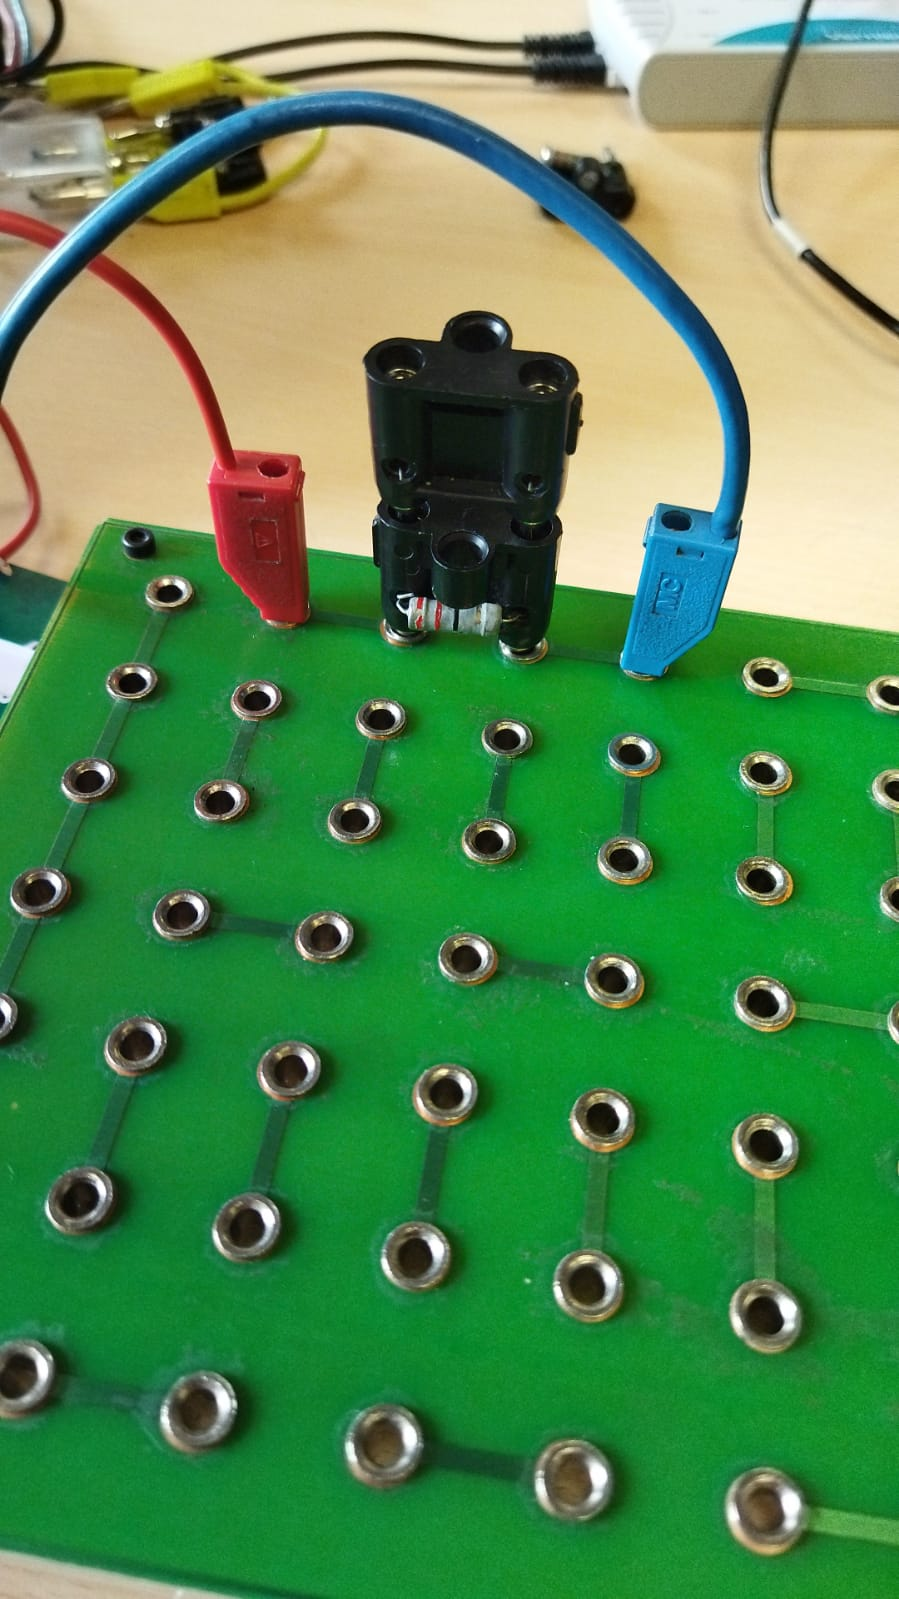

**imagen 3**
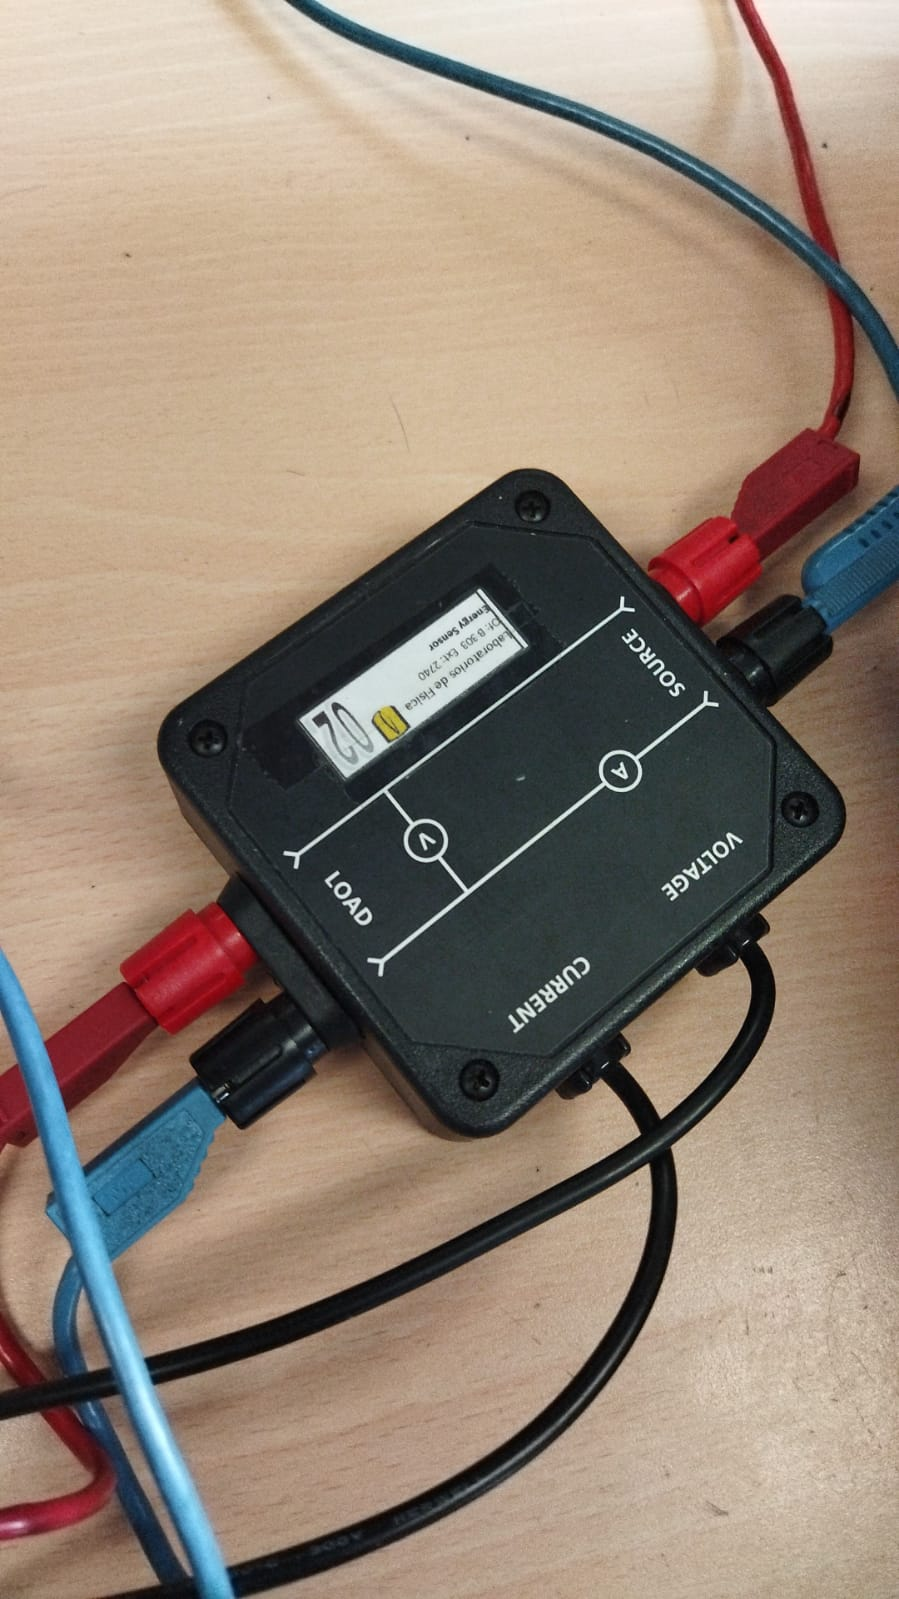

# Conclusiones

Los objetivos de la práctica son claros desde el inicio, comprobar si efectivamente se cumple la ley de ohm para los conductores,verificar el comportamiento no óhmico de un diodo, verificar como se comportan las resistencias en paralelo y en seríe.

Basado en el análisis hecho con anterioridad podemos decir que estos objetivos se cumplieron ya que:
- Comprobamos la ley de ohm para conductores y llegamos a resultados experimentales cercanos a los teóricos

        R1(experimental: 10  teórico: 10 ) 
        
        R2(experimental: 23  teórico: 22  ) 
        
        Rpar(experimental: 34  teórico: 32  ) 
        
        Rserie(experimental: 7  teórico: 7 )
        
- Comprobamos el comportamiento no óhmico de los diodos(ver imagen adjunta)

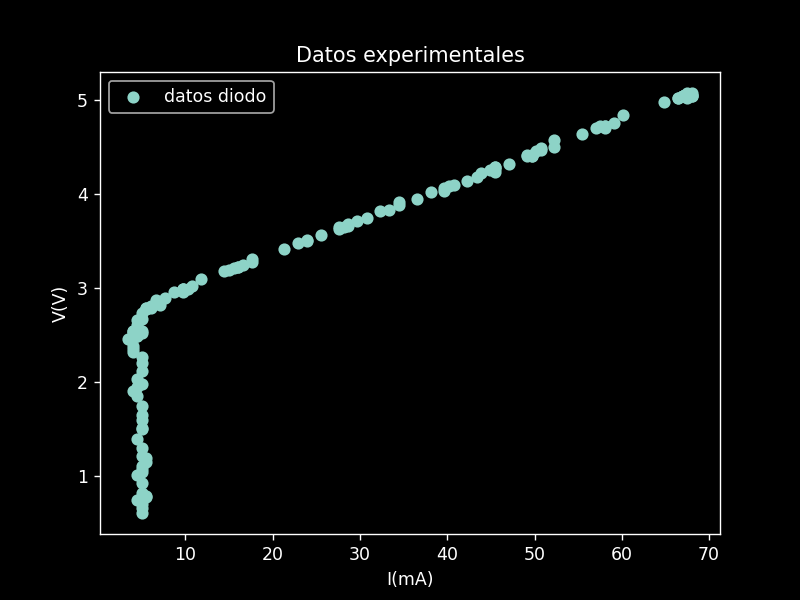

Por último podimos evidenciar de primera mano el comportamiento básico de los circuitos(montaje,herramientas, convenciones sobre la lectura de resistencias de los resitores) y llevar a la práctica el conocimiento teórico de la física acerca de estos fenómenos.